In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

In [2]:
# Download time series data using yfinance
# data = yf.download('AAPL', start='2018-01-01', end='2023-06-30')

In [5]:
import torch
# torch.save(data, 'data.pt')

d:\condaPath\GNNS\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
data = torch.load('data.pt')

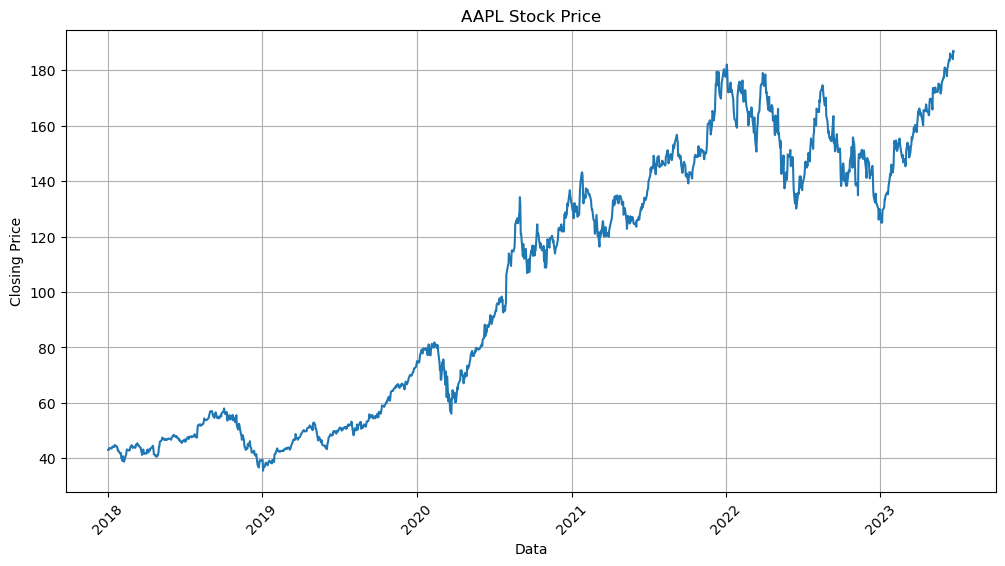

In [7]:
# Plot the time series data
plt.figure(figsize=(12, 6))
plt.plot(data['Close'])
plt.xlabel('Data')
plt.ylabel('Closing Price')
plt.title('AAPL Stock Price')
plt.xticks(rotation=45)
plt.grid(True)

In [8]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,42.540001,43.075001,42.314999,43.064999,40.831593,102223600
2018-01-03,43.132500,43.637501,42.990002,43.057499,40.824471,118071600
2018-01-04,43.134998,43.367500,43.020000,43.257500,41.014099,89738400
2018-01-05,43.360001,43.842499,43.262501,43.750000,41.481064,94640000
2018-01-08,43.587502,43.902500,43.482498,43.587502,41.326988,82271200
...,...,...,...,...,...,...
2023-06-16,186.729996,186.990005,184.270004,184.919998,184.919998,101235600
2023-06-20,184.410004,186.100006,184.410004,185.009995,185.009995,49799100
2023-06-21,184.899994,185.410004,182.589996,183.960007,183.960007,49515700


In [9]:
# Check for missing values
missing_values = data.isnull().sum()
print(missing_values)

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


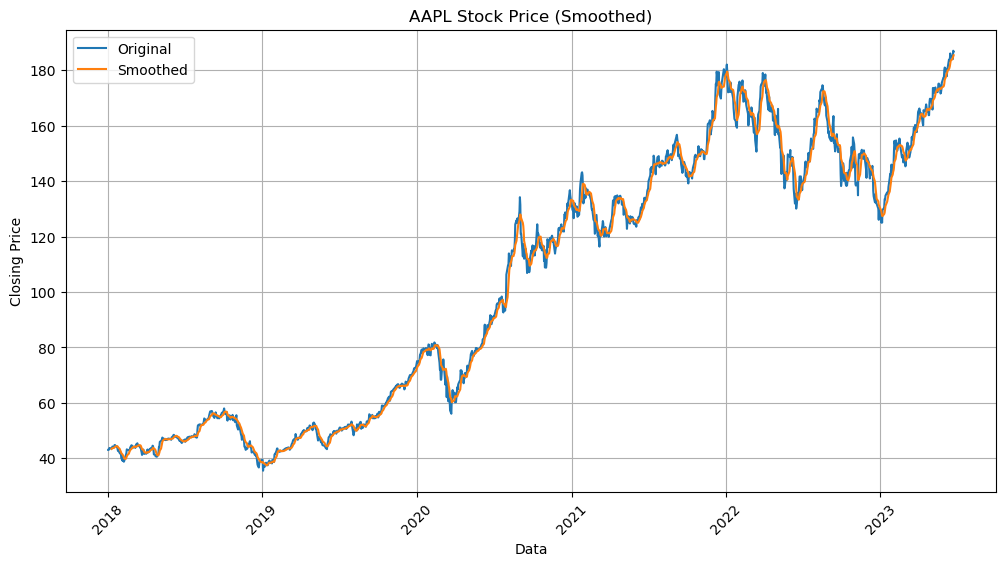

In [10]:
# Smooth the time series data using a moving average
window_size = 7
data['Smoothed'] = data['Close'].rolling(window_size).mean()

# Plot the smoothed data
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='Original')
plt.plot(data['Smoothed'],label='Smoothed')
plt.xlabel('Data')
plt.ylabel('Closing Price')
plt.title('AAPL Stock Price (Smoothed)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

plt.show()
# 该图显示了原始收盘价和使用移动平均线获得的平滑版本。平滑有助于整体趋势的可视化和减少短期波动的影响

Date
2018-01-02   -1.264025
2018-01-03   -1.264182
2018-01-04   -1.259993
2018-01-05   -1.249677
2018-01-08   -1.253081
                ...   
2023-06-16    1.707163
2023-06-20    1.709048
2023-06-21    1.687056
2023-06-22    1.750729
2023-06-23    1.744027
Name: Close, Length: 1378, dtype: float64
Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume, Smoothed]
Index: []


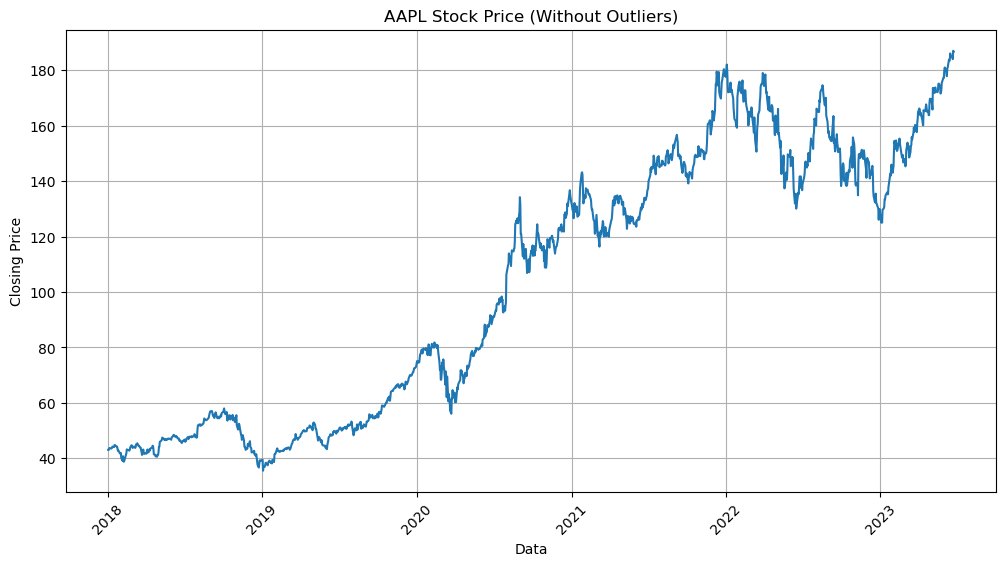

In [12]:
# remove outlier
# Calculate z-scores for each data point
z_scores = (data['Close'] - data['Close'].mean()) / data['Close'].std()
print(z_scores)

# Define a threshold for outlier detection
threshold = 3

# Identify outliers
outliers = data[np.abs(z_scores) > threshold]
print(outliers)

# Remove outliers from the data
data = data.drop(outliers.index)

# Plot the data without outliers
plt.figure(figsize=(12, 6))
plt.plot(data['Close'])
plt.xlabel('Data')
plt.ylabel('Closing Price')
plt.title('AAPL Stock Price (Without Outliers)')
plt.xticks(rotation=45)
plt.grid(True)

plt.show()

# 这里删除的异常值是非常明显的值（极值），也就是说这个预处理是初筛，或者叫粗筛。把非常明显的值删除，这样模型可以更好的判断哪些难判断的值。

In [13]:
outliers

,Open,High,Low,Close,Adj Close,Volume,Smoothed
Date,,,,,,,


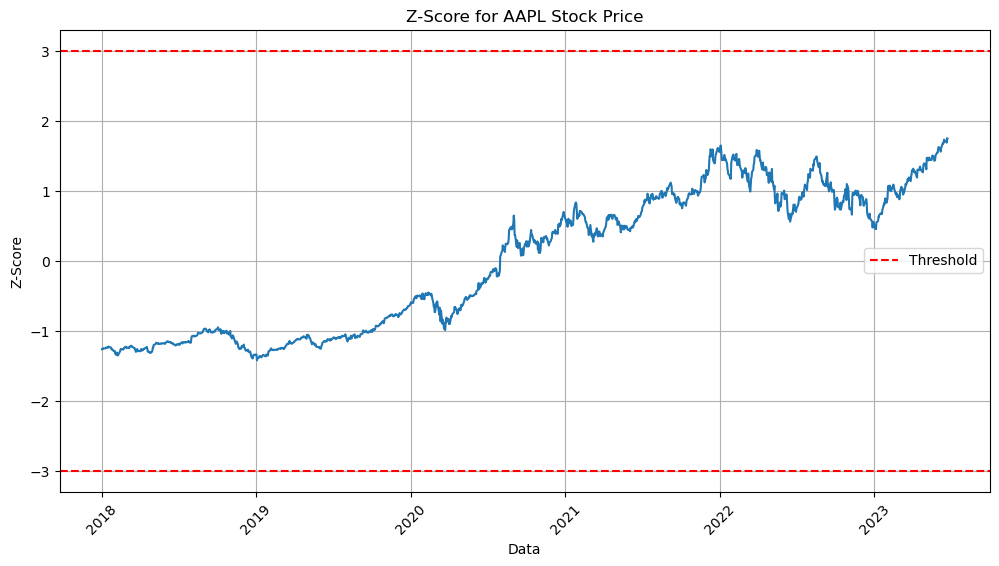

In [14]:
# 统计方法：z-score和移动平均
# 1：z-score
# z-score 衡量的是观察值离均值的标准差数。通过计算每个数据点的z分数，我们可以识别明显偏离预期行为的观察值
# Calculate z-scores for each data point
z_scores = (data['Close'] - data['Close'].mean()) / data['Close'].std()
z_scores

# Plot the z-scores
plt.figure(figsize=(12, 6))
plt.plot(z_scores)
plt.xlabel('Data')
plt.ylabel('Z-Score')
plt.title('Z-Score for AAPL Stock Price')
plt.xticks(rotation=45)
plt.axhline(y=threshold, color='r', linestyle='--', label='Threshold')
plt.axhline(y=-threshold, color='r', linestyle='--')
plt.legend()
plt.grid()

plt.show()

# 该图显示了每个数据点的计算z-score。z-score高于阈值（红色虚线）的观测值可视为异常

Date
2018-01-02           NaN
2018-01-03           NaN
2018-01-04           NaN
2018-01-05           NaN
2018-01-08           NaN
                 ...    
2023-06-16    183.358571
2023-06-20    183.992855
2023-06-21    184.421426
2023-06-22    184.879998
2023-06-23    185.361426
Name: Close, Length: 1378, dtype: float64


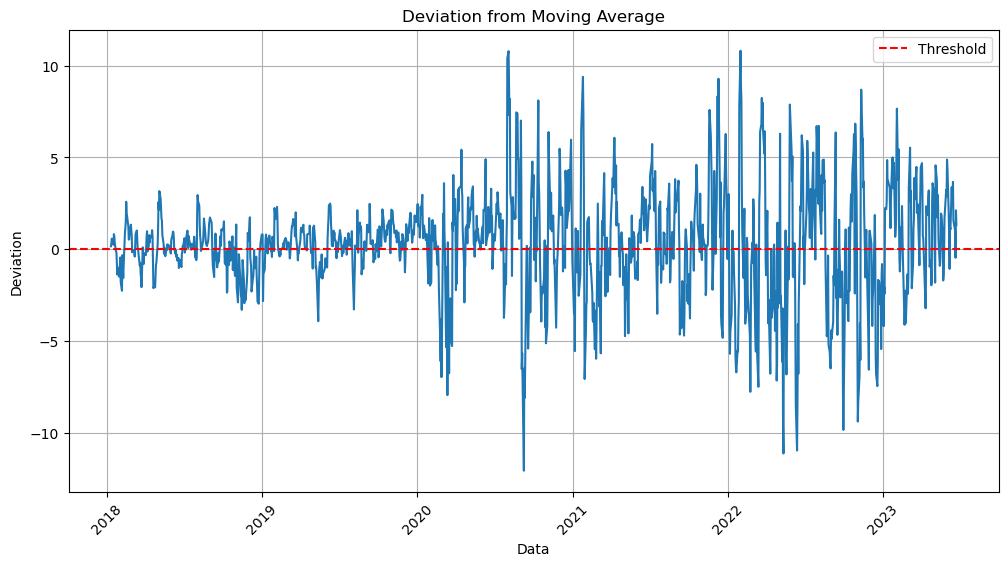

In [16]:
# 移动平均线
# 通过计算移动平均线并将其与原始数据进行比较，我们可以识别与预期行为的偏差
# Calculate the moving average
window_size = 7
moving_average = data['Close'].rolling(window_size).mean()
print(moving_average)

# Calculate the deviation from the moving average
deviation = data['Close'] - moving_average

# Plot the deviation 
plt.figure(figsize=(12, 6))
plt.plot(deviation)
plt.xlabel('Data')
plt.ylabel('Deviation')
plt.title('Deviation from Moving Average')
plt.xticks(rotation=45)
plt.axhline(y=0, color='r', linestyle='--', label='Threshold')
plt.legend()
plt.grid(True)

# 该图显示了每个数据点与移动平均线的偏差。正偏差表示值高于预期行为，负偏差表示低于预期行为

### 机器学习方法

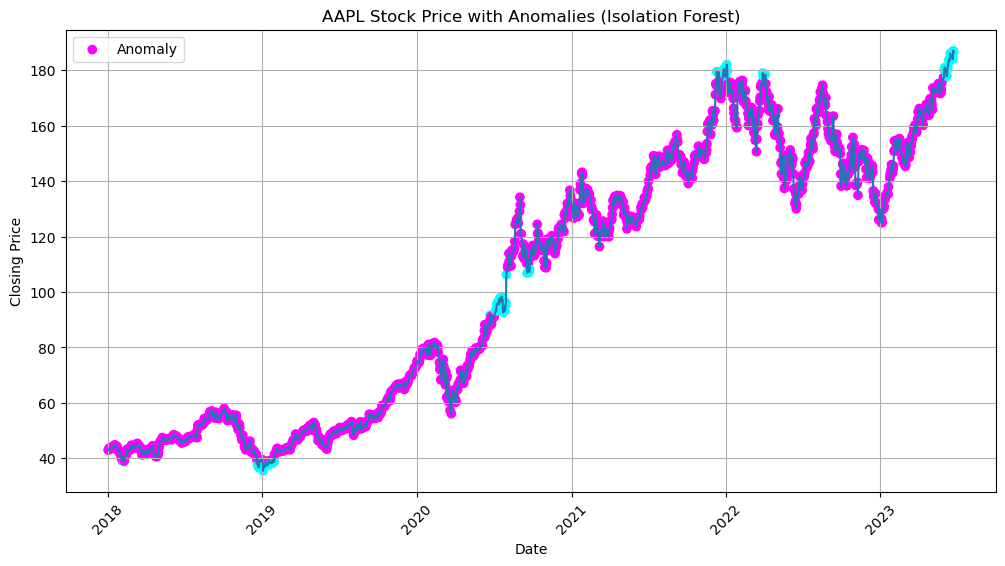

In [17]:
# 孤立森林
# 孤立森林是一种无监督机器学习算法，通过将数据随机划分为子集来隔离异常。它测量隔离观察所需的平均分区数，而异常情况预计需要更少的分区
from sklearn.ensemble import IsolationForest

# Prepare the data for Isolation Forest
X = data['Close'].values.reshape(-1, 1)

# Train the Isolation Forest model
model = IsolationForest(contamination=0.05)
model.fit(X)

# Predict the anomalies
anomalies = model.predict(X)

# Plot the anomalies
plt.figure(figsize=(12, 6))
plt.plot(data['Close'])
plt.scatter(data.index, data['Close'], c=anomalies, cmap='cool', label='Anomaly')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('AAPL Stock Price with Anomalies (Isolation Forest)')
plt.xticks(rotation=45)
plt.legend()
plt.grid()

plt.show()

In [ ]:
print(anomalies)
print(len(anomalies))
print(len(X))

[ 1  1  1 ... -1 -1 -1]
1378
1378


Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "d:\condaPath\GNNS\lib\asyncio\events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "d:\condaPath\GNNS\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] 远程主机强迫关闭了一个现有的连接。
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "d:\condaPath\GNNS\lib\asyncio\events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "d:\condaPath\GNNS\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] 远程主机强迫关闭了一个现有的连接。
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoo

In [ ]:
# LSTM Autoencoder
# LSTM (Long-Short-Term Memory) 自编码是一种深度学习模型，能够学习时间序列数据中的模式并重构输入序列。通过将重建误差与预定义的阈值进行比较，可以检测异常

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Prepare the data for LSTM Autoencoder
X = data['Close'].values.reshape(-1, 1)

# Normalize the data
X_normalized = (X - X.min()) / (X.max() - X.min())

# Train the LSTM Autoencoder model
model = Sequential([
    LSTM(64, activation='relu', input_shape=(1, 1)),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.fit(X_normalized, X_normalized, epochs=10, batch_size=32)

# Reconstruct the input sequence
X_reconstructed = model.predict(X_normalized)

# Calculate the reconstruction error
reconstruction_error = np.mean(np.abs(X_normalized - X_reconstructed), axis=1)

# Plot the reconstruction error
plt.figure(figsize=(12, 6))
plt.plot(reconstruction_error)
plt.xlabel('Data')
plt.ylabel('Reconstruction Error (LSTM Autoencoder)')
plt.xticks(rotation=45)
plt.axhline(y=threshold, color='r', linestyle='--', label='Threshold')
plt.legend()
plt.grid(True)

plt.show()